In [1]:
#Code will basically do these steps:
# import timeseries
# Test for its stationarity
# implement a ARIMA model

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas_datareader import data
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [7]:
start_date = '2016-01-01'
end_date = '2020-01-01'
panel_data = data.DataReader('AAPL','yahoo',start_date,end_date)
close = panel_data['Adj Close']
close.head()

Date
2016-01-04    97.948441
2016-01-05    95.493919
2016-01-06    93.625145
2016-01-07    89.673714
2016-01-08    90.147873
Name: Adj Close, dtype: float64

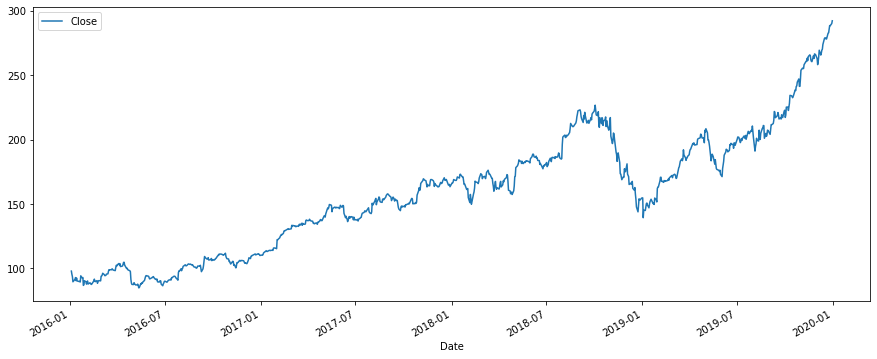

In [8]:

df = pd.DataFrame(close)
df.columns = ['Close']
df.head()
df.plot()

In [9]:
"""
def test_stationarity(timeseries):
    
    #Rolling data
    rolmean = timeseries.rolling(window = '15D').mean()
    rolstd = timeseries.rolling(window = '15D').std()
    
    #Plot the statistics
    orig = plt.plot(timeseries,color = 'blue',label = 'Original')
    mean = plt.plot(rolmean,color = 'red',label = 'Rolling mean')
    std = plt.plot(rolmean,color = 'green',label = 'Rolling std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-9-83f860f3db6f>, line 23)

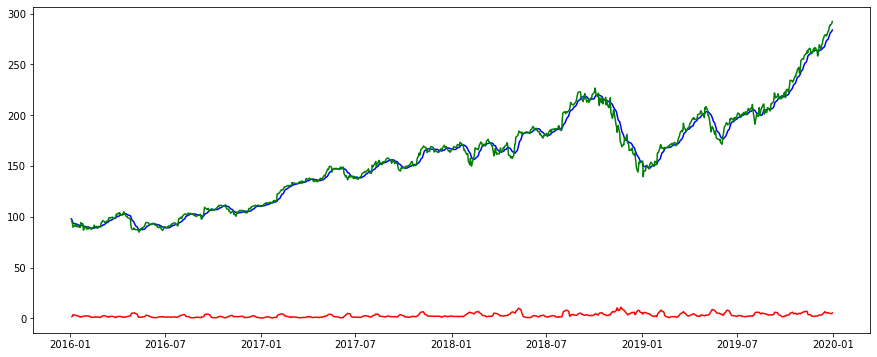

In [10]:
period = '15D'
rolmean = df.rolling(window = period).mean()
rolstd = df.rolling(window = period).std()
plt.plot(rolmean,color = 'blue',label = 'Mean')
plt.plot(rolstd,color = 'red',label = 'Deviation')
plt.plot(df,color = 'green',label= 'Original')


plt.show()


In [11]:
 #Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.653389
p-value                          0.988860
#Lags Used                       9.000000
Number of Observations Used    996.000000
Critical Value (1%)             -3.436933
Critical Value (5%)             -2.864446
Critical Value (10%)            -2.568317
dtype: float64


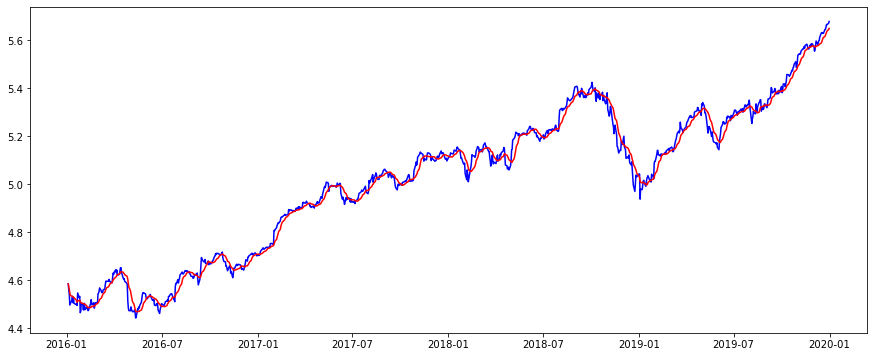

In [12]:
log_df = np.log(df)
plt.plot(log_df,color = 'blue')
moving_avg = log_df.rolling('15D').mean()
plt.plot(moving_avg,color = 'red')

In [13]:
diff = log_df - moving_avg
moving_avg.head()

,Close
Date,
2016-01-04,4.584441
2016-01-05,4.571752
2016-01-06,4.560934
2016-01-07,4.544745
2016-01-08,4.536086


In [14]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.824992e+00
p-value                        6.517550e-12
#Lags Used                     8.000000e+00
Number of Observations Used    9.970000e+02
Critical Value (1%)           -3.436926e+00
Critical Value (5%)           -2.864443e+00
Critical Value (10%)          -2.568316e+00
dtype: float64


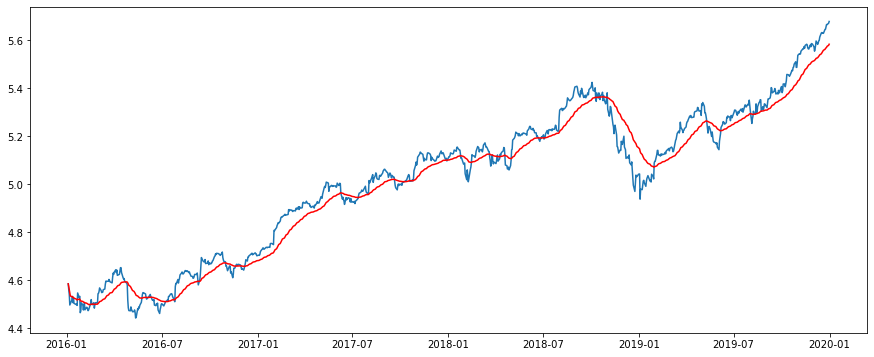

In [15]:
exp_ma = log_df.ewm(halflife = 15).mean()
plt.plot(log_df)
plt.plot(exp_ma,color = 'red')


In [16]:
#Testing different moving averages
exp_diff = log_df - exp_ma
print('Results of Dickey-Fuller Test:')
dftest = adfuller(exp_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -4.477932
p-value                          0.000216
#Lags Used                       9.000000
Number of Observations Used    996.000000
Critical Value (1%)             -3.436933
Critical Value (5%)             -2.864446
Critical Value (10%)            -2.568317
dtype: float64


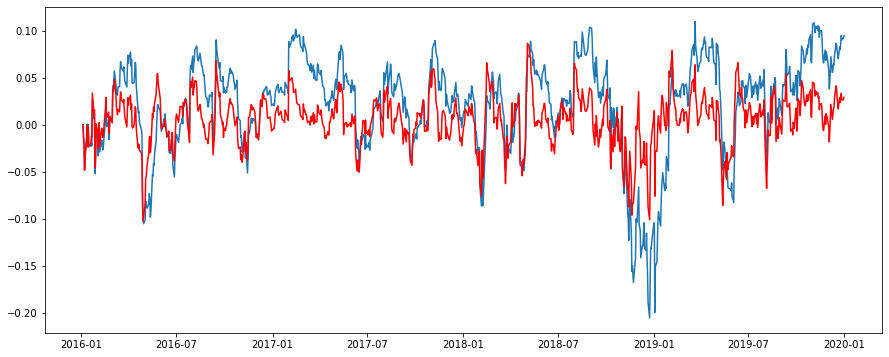

In [17]:
plt.plot(exp_diff)
plt.plot(diff, color = 'red')

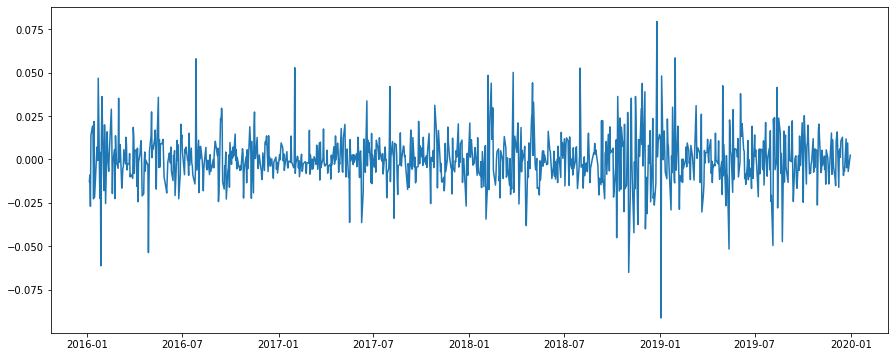

In [18]:
#Eliminating trend
new_diff = diff - diff.shift()
plt.plot(new_diff)

In [19]:
new_diff.dropna(inplace=True)
exp_diff = log_df - exp_ma
print('Results of Dickey-Fuller Test:')
dftest = adfuller(new_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.212804e+01
p-value                        1.762036e-22
#Lags Used                     1.400000e+01
Number of Observations Used    9.900000e+02
Critical Value (1%)           -3.436973e+00
Critical Value (5%)           -2.864464e+00
Critical Value (10%)          -2.568327e+00
dtype: float64


In [20]:
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

In [21]:
def make_stationary(timeseries):
    log_ts = np.log(timeseries)
    moving_avg = timeseries.rolling('15D').mean()
    exp_ma = log_ts.ewm(halflife = 12).mean()
    diff = log_ts - moving_avg
    exp_diff = log_ts - exp_ma
    test_stationarity(diff)
    diff_test = dfoutput['p-value']
    test_stationarity(exp_diff)
    exp_diff_test = dfoutput['p-value']
    if diff_test > exp_diff_test:
        return diff,diff_test
    else:
        return exp_diff,exp_diff_test
       
    

In [22]:
stat, p = make_stationary(df)
p
stat

,Close
Date,
2016-01-04,0.000000
2016-01-05,-0.012323
2016-01-06,-0.020768
2016-01-07,-0.046507
2016-01-08,-0.032008
...,...
2019-12-24,0.064838
2019-12-26,0.079742
2019-12-27,0.074908


In [23]:
#Forecasting stock prices 
 # Getting ACF and PACF 
 # Fitting the model

C:\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

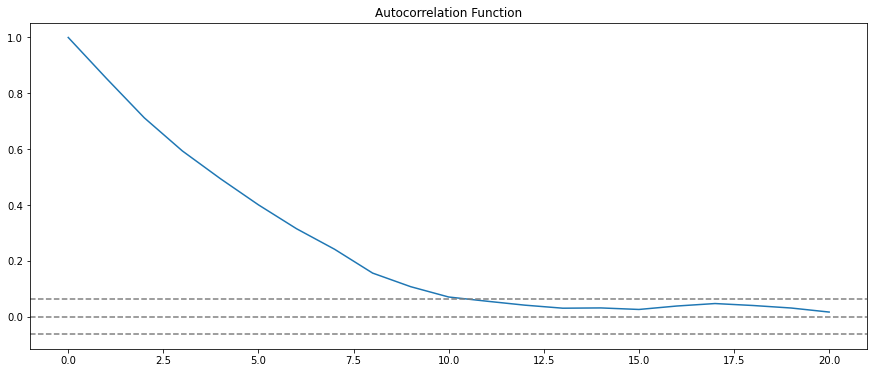

In [24]:
lag_acf = acf(diff, nlags=20)
lag_pacf = pacf(diff, nlags=20, method='ols')

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


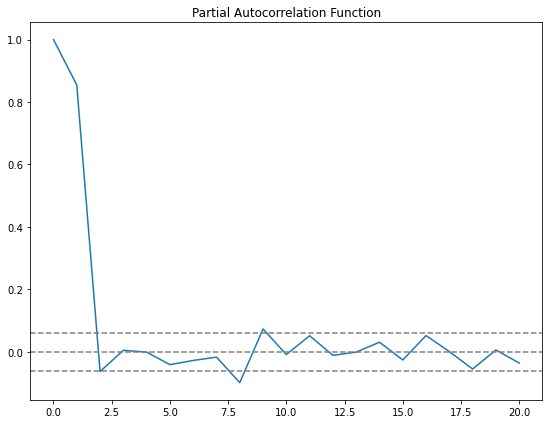

In [25]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [26]:
"""
To determine q and p values:
  P is the first time the chart crosses the dotted line : from the charts we can imagine will be something
  between 2.3 .Let's try to build a function to return those values :
  """
root_p = []
root_q = []
for i in range(len(lag_pacf)):
    if lag_acf[i] <= 1.96/np.sqrt(len(diff)) :
        root_p.append(i)
#Doing the same thing for q:
for i in range(len(lag_acf)):
    if lag_acf[i] <= 1.96/np.sqrt(len(diff)) :
        root_q.append(i)
p = root_p[0]
q = root_q[0]

C:\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "

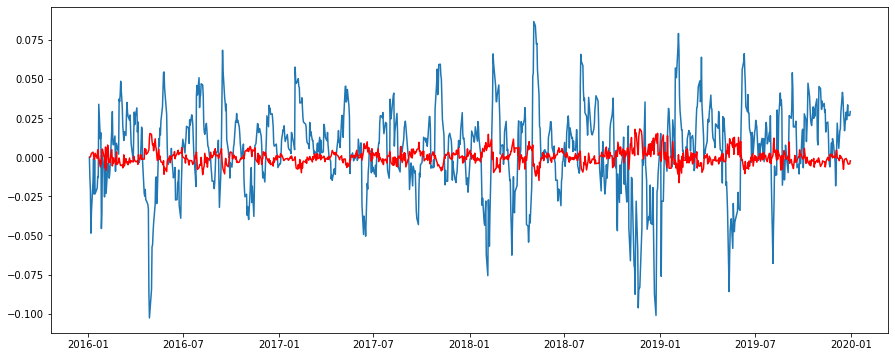

In [27]:
# Making a model of ARIMA models

model = ARIMA(diff, order=(p, 1, q))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(diff)
plt.plot(results_ARIMA.fittedvalues, color='red')


In [28]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2016-01-05    0.000006
2016-01-06    0.000197
2016-01-07    0.001240
2016-01-08    0.002379
2016-01-11    0.003203
dtype: float64

In [29]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2016-01-05    0.000006
2016-01-06    0.000203
2016-01-07    0.001443
2016-01-08    0.003823
2016-01-11    0.007026
dtype: float64

In [30]:
#predictions_ARIMA_log = pd.Series(diff.loc[0], index=diff.index)
predictions_ARIMA_log = diff.add(predictions_ARIMA_diff_cumsum )
predictions_ARIMA_log.head()

,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,2016-01-19 00:00:00,...,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00,Close
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df)**2)/len(df)))

In [ ]:
plt.plot(predictions_ARIMA)